In [102]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ted_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


In [4]:
df.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


In [6]:
df.describe()

,views,likes
count,5.440000e+03,5.440000e+03
mean,2.061576e+06,6.260762e+04
std,3.567098e+06,1.076468e+05
min,5.320000e+02,1.500000e+01
25%,6.707500e+05,2.000000e+04
50%,1.300000e+06,4.050000e+04
75%,2.100000e+06,6.500000e+04
max,7.200000e+07,2.100000e+06


In [8]:
df.isnull().sum()

title     0
author    1
date      0
views     0
likes     0
link      0
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df.title.nunique()

5439

## MOST POPULAR TED TALKS

In [14]:
popular_ted = df.sort_values(by = 'views', ascending = False)
popular_ted.head(5)

,title,author,date,views,likes,link
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...
4084,Your body language may shape who you are,Amy Cuddy,June 2012,64000000,1900000,https://ted.com/talks/amy_cuddy_your_body_lang...
2958,Inside the mind of a master procrastinator,Tim Urban,February 2016,60000000,1800000,https://ted.com/talks/tim_urban_inside_the_min...
4765,How great leaders inspire action,Simon Sinek,September 2009,57000000,1700000,https://ted.com/talks/simon_sinek_how_great_le...
4605,The power of vulnerability,Brené Brown,June 2010,56000000,1700000,https://ted.com/talks/brene_brown_the_power_of...


### BY SORTING THE DATA FRAME BY VIEWS OF THE TOPICS, WE CAN SEE IN THE ABOVE TABLE , topic that " Do schools kill creativity ?" is have high view rate 

## Finding the most popular ted talks speakers  in terms of number of talks

In [44]:

speaker_popularity = df.groupby('author').size().reset_index(name='talks_count')

most_prolific_speakers = speaker_popularity.sort_values(by='talks_count', ascending=False)

# Print the top 10 most prolific speakers
print(most_prolific_speakers.head(10))


                author  talks_count
148       Alex Gendler           45
1781  Iseult Gillespie           33
2845       Matt Walker           18
152     Alex Rosenthal           15
1283     Elizabeth Cox           13
1338        Emma Bryce           12
962      Daniel Finkel           11
2216     Juan Enriquez           11
933         Dan Finkel            9
1655      Hans Rosling            9


## month-wise analysis 

### create a new features

In [16]:
date = list(df.date)

month = []
year = []

for i in date:
    lst = i.split(" ")
    month.append(lst[0])
    year.append(lst[1])
df['month'] = month
df['year']  = year

In [17]:
df.head()

,title,author,date,views,likes,link,month,year
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,December,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,February,2022
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,September,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,October,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,October,2021


In [18]:
df.month.nunique()

12

In [19]:
df.year.unique()

array(['2021', '2022', '2019', '2016', '2017', '2020', '2015', '2014',
       '2018', '1970', '2012', '2013', '2009', '2010', '2011', '1994',
       '2005', '2007', '2006', '1972', '2008', '2001', '1983', '1991',
       '2004', '2003', '2002', '1998', '1990', '1984'], dtype=object)

## CALCULATE THE VIEWS AND LIKES OF EACH MONTH

In [25]:
month_wise = {}

month = df.month.values
for mon in month:
    views = df[df['month'] == mon]['views'].sum()
    likes = df[df['month'] == mon]['likes'].sum()
    
    month_wise[mon] = {'views' : views, 'likes' : likes }

In [41]:
month_df = pd.DataFrame(month_wise)
month_df = month_df.T.sort_values(by = 'views')
month_df

,views,likes
August,295820997,9008649
January,302850399,9196042
December,602291300,18319397
September,606392100,18433456
May,658259600,19961849
July,864732799,26254756
October,965331498,29302963
June,1164034699,35242674
November,1180802199,35867373
April,1214604196,36985230


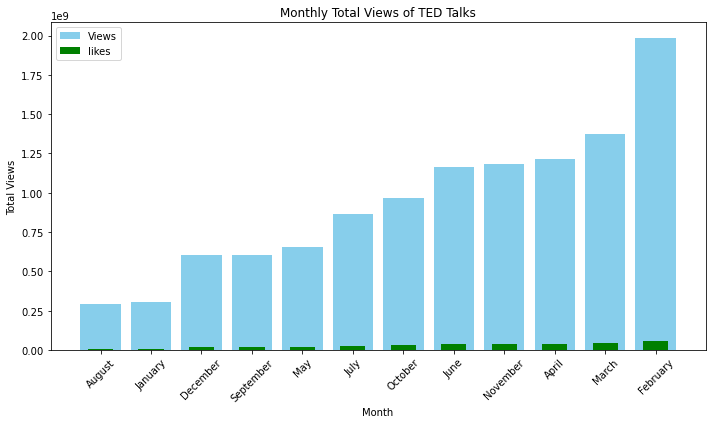

In [123]:
months = list(month_df.index)
views = [month_wise[mon]['views'] for mon in months]
likes = [month_wise[mon]['likes'] for mon in months]

# Create a bar plot for views
plt.figure(figsize=(10, 6))
plt.bar(months, views, label='Views', color='skyblue')
plt.bar(months, likes, label='likes',width = 0.5,color='green')
plt.xlabel('Month')
plt.ylabel('Total Views')
plt.title('Monthly Total Views of TED Talks')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


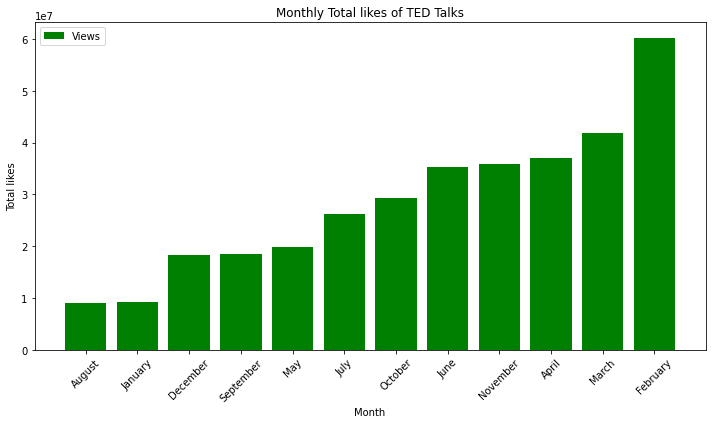

In [124]:
months = list(month_df.index)
views = [month_wise[mon]['views'] for mon in months]
likes = [month_wise[mon]['likes'] for mon in months]

# Create a bar plot for likes
plt.figure(figsize=(10, 6))
plt.bar(months, likes, label='Views', color='green')
plt.xlabel('Month')
plt.ylabel('Total likes')
plt.title('Monthly Total likes of TED Talks')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


## Year wise analysis

In [60]:

year_count = df.groupby('year').size().reset_index(name='talks_count')

year_count = year_count.sort_values(by='talks_count', ascending=False)


print(year_count.head(10))


    year  talks_count
26  2019          544
27  2020          501
24  2017          495
25  2018          473
23  2016          399
28  2021          390
20  2013          388
22  2015          376
21  2014          357
19  2012          302


In [61]:
year_wise = {}

years = df.year.values
for year in years:
    views = df[df['year'] ==  year]['views'].sum()
    likes = df[df['year'] ==  year]['likes'].sum()
    
    year_wise[str(year)] = {'views' : views, 'likes' : likes }

In [62]:
year_df = pd.DataFrame(year_wise)
year_df = year_df.T.sort_values(by = 'views', ascending = False)
year_df

,views,likes
2015,1154739598,35151746
2013,1062537497,32249916
2017,998891600,30516328
2019,948119299,28764575
2016,928894896,28306782
2014,824652297,25076665
2018,811857597,24671493
2012,803186000,24331209
2020,635944200,19297014
2011,575677999,17478900


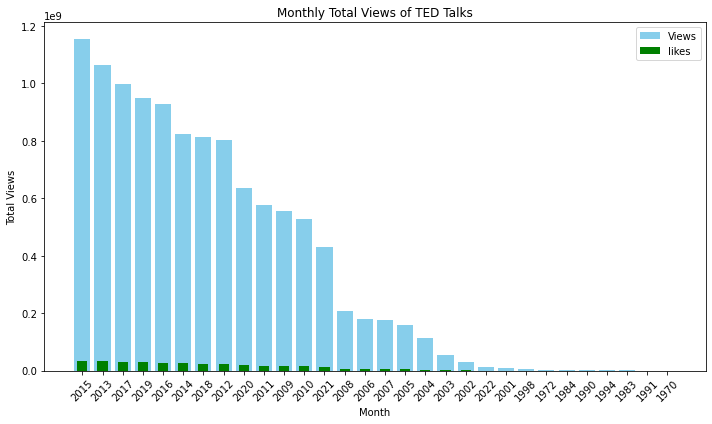

In [125]:
months = list(year_df.index)
views = [year_wise[mon]['views'] for mon in months]
likes = [year_wise[mon]['likes'] for mon in months]

# Create a bar plot for views
plt.figure(figsize=(10, 6))
plt.bar(months, views, label='Views', color='skyblue')
plt.bar(months, likes, label='likes',width = 0.5,color='green')
plt.xlabel('Month')
plt.ylabel('Total Views')
plt.title('Monthly Total Views of TED Talks')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


## TED talks of my fovorite author 

In [66]:
fav_author = 'Emma Bryce'
fav_df = df[df['author'] == fav_author]

topics = fav_df.title
for i in topics:
    print(i)

Why do cats have vertical pupils?
What is HPV and how can you protect yourself from it?
How does the immune system work?
The power of the placebo effect
How do your hormones work?
Why do we itch?
How to use a semicolon
What is a calorie?
What really happens to the plastic you throw away?
How does the thyroid manage your metabolism?
The case of the vanishing honeybees
Should we eat bugs?


## Finding the ted talks with best views to likes ratio

In [68]:
df['views_to_likes_ratio'] = df['views'] / df['likes']

best_ratio_talks = df.sort_values(by='views_to_likes_ratio', ascending=False)

# Print the top 10 talks with the best views-to-likes ratio
best_ratio_talks[['title', 'author', 'views', 'likes', 'views_to_likes_ratio']].head(10)


,title,author,views,likes,views_to_likes_ratio
955,A camera that can see around corners,David Lindell,364000,10000,36.400000
905,What's the point(e) of ballet?,Ming Luke,364000,10000,36.400000
837,How to see more and care less: The art of Geor...,Iseult Gillespie,364000,10000,36.400000
26,Can you outsmart the fallacy that divided a na...,Elizabeth Cox,363000,10000,36.300000
1016,The function and fashion of eyeglasses,Debbie Millman,363000,10000,36.300000
3089,How computers translate human language,Ioannis Papachimonas,398000,11000,36.181818
4389,The right to understand,Sandra Fisher-Martins,361000,10000,36.100000
4362,How to topple a dictator,Srdja Popovic,397000,11000,36.090909
5129,On glamour,Virginia Postrel,433000,12000,36.083333
1125,Hacking bacteria to fight cancer,Tal Danino,396000,11000,36.000000


## Finding ted talks based on the tags

In [96]:
tag1 = 'Climate'

topics = df[df['title'].str.contains(tag1)]['title']
for i in topics:
    print(i)

Education is a fundamental right for every child
Education innovation in the slums


In [98]:
tag2 = 'education'

topics = df[df['title'].str.contains(tag2)]['title']
for i in topics:
    print(i)

Sex education should start with consent
3 ways to lower the barriers to higher education
What COVID-19 revealed about US schools — and 4 ways to rethink education
Rethinking education and celebrating the Arabic language
A path to higher education and employment for refugees
The "opportunity gap" in US public education — and how to close it
The benefits of music education
How education helped me rewrite my life
How peer educators can transform sex education
Sir Ken Robinson (still) wants an education revolution	
Why we need to make education more accessible to the deaf
Why I fight for the education of refugee girls (like me)
The case for reforming STEM education
Help for kids the education system ignores
How to fix a broken education system ... without any more money
How to escape education's death valley
What we're learning from online education
Let's use video to reinvent education
Changing education paradigms
The child-driven education
A call to reinvent liberal arts education
A pass

In [100]:
tag3 = 'love'

topics = df[df['title'].str.contains(tag3)]['title']
for i in topics:
    print(i)

Can love and independence coexist?
The Black history of twerking — and how it taught me self-love
A queer journey from shame to self-love
Why should you read Toni Morrison's "Beloved"?
How love can help repair social inequality
What foods did your ancestors love?
The necessity of normalizing queer love
My story of love and loss as a transracial adoptee
For the love of fangirls
A love story for the coral reef crisis
Make love, not porn
Can we choose to fall out of love?
Grief and love in the animal kingdom
"Everything happens for a reason" — and other lies I've loved
The difference between healthy and unhealthy love
A love story about the power of art as organizing
How ugly, unloved food can change the world
Intimate photos of a senior love triangle
A love letter to realism in a time of grief
Love others to love yourself
Why you should love gross science
3 lessons of revolutionary love in a time of rage
A mother and son united by love and art
For the love of birds
Thoughts on humanity, 

## finding the most popular ted talks speakers  in terms of number of views

In [101]:
speaker_popularity = df.groupby('author')['views'].sum().reset_index()
most_popular_speakers = speaker_popularity.sort_values(by='views', ascending=False)

# Print the top 10 most popular speakers by views
print(most_popular_speakers.head(10))


                author      views
148       Alex Gendler  187196000
3902  Sir Ken Robinson   95654000
544         Bill Gates   77800000
3895       Simon Sinek   74800000
594        Brené Brown   72000000
2240   Julian Treasure   64300000
244          Amy Cuddy   64000000
4184         Tim Urban   60000000
1781  Iseult Gillespie   54998000
2914     Mia Nacamulli   44174000
